## Tarea 4
#### Luis Enrique López Nerio
##### Procesamiento de imagenes digitales


Parte 1
Operaciones Básicas
En esta primera parte se trabajaran con algunas funciones basicas de procesamiento de imagenes de la libreria pillow como lo son lectura, modificaciones de tamaño, corte, etc.
Para esto se trabajara un conjunto de imagenes que estan en la carpeta ***Imagenes***, esta carpeta contiene 369 imagenes.  
La idea es aplicar de manera aleatoria modificaciones a cada una de las imagenes y realizar un collage con ellas pegandolas sobre un fondo blanco.
En realidad no tiene ningun proposito más que entender el funcionamiento de la funciones de procesamiento basico de pillow.
Las imagenes son en su mayoria grabados del artista Gustave Dore.

### Librerias a utilizar

In [42]:
from PIL import Image, ImageFilter, ImageDraw
import numpy as np
from PIL import Image
import random
import glob
import matplotlib as plt

Se obtienen las rutas de las imagenes en la carpeta ***Imagenes***

In [44]:

Imagenes1 = glob.glob(".\\Imagenes\*")
random.shuffle(Imagenes1)

Se lee la ruta de cada una de las imagenes y se guarda la imagen en el vector imagenes 1

In [45]:

imagenes1 = []
for imagen in Imagenes1:
    imagenes1.append(Image.open(imagen))

A cada una de las imagenes se les aplica una rotación aleatoria entre 0 y 360 grados y una reescala de entre 2 y 7 veces su tamaño.

<img src="rotar.PNG" alt="Rotar" style="height: 200px; width:200px;"/>
<img src="reescalar.PNG" alt="Reescalar" style="height: 200px; width:200px;"/>

In [46]:

for i in range(len(imagenes1)):
    imagenes1[i]=imagenes1[i].rotate(random.randint(0,360))
    imagenes1[i] = imagenes1[i].resize((imagenes1[i].width //random.randint(2,7) , imagenes1[i].height //random.randint(2,7)))

Se crea un fondo blanco de 1000 por 1000 pixeles

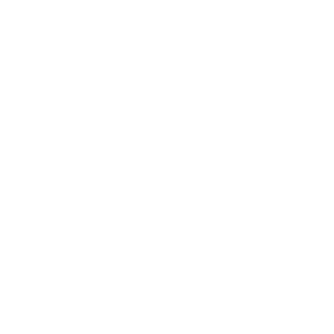

In [12]:
img = np.zeros([1000,1000,3],dtype=np.uint8)
img.fill(255) # numpy array!
im = Image.fromarray(img) #convert numpy array to image
im.reduce(3)

A cada una de las imagenes se le crea una mascara por ejemplo.  
Se toma una imagen

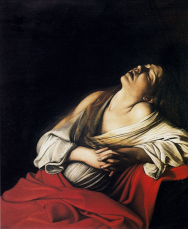

In [64]:
with Image.open(".\\Caravaggio.jpg") as ejemplo:
    ejemplo.load()
ejemplo = ejemplo.reduce(3)
ejemplo

Se crea una mascara de forma aleatoria en la imagen y se aplica

In [70]:
fondo = np.zeros([300,300,3],dtype=np.uint8)
fondo.fill(255) # numpy array!
fondo = Image.fromarray(fondo) #convert numpy array to image


mask_im = Image.new("L", ejemplo.size, 0)
draw = ImageDraw.Draw(ejemplo)
draw.ellipse((random.randint(0,ejemplo.size[0]//3),random.randint(0,ejemplo.size[1]//3),
random.randint(ejemplo.size[0]//2,ejemplo.size[0]),random.randint(ejemplo.size[1]//2,ejemplo.size[1])), fill=255)
mask_im = mask_im.filter(ImageFilter.GaussianBlur(10))
fondo.paste(ejemplo,mask_im)


In [74]:

for imagen in imagenes1:
    mask_im = Image.new("L", imagen.size, 0)
    draw = ImageDraw.Draw(mask_im)
    draw.ellipse((random.randint(0,imagen.size[0]//3),random.randint(0,imagen.size[1]//3),
    random.randint(imagen.size[0]//2,imagen.size[0]),random.randint(imagen.size[1]//2,imagen.size[1])), fill=255)
    mask_im = mask_im.filter(ImageFilter.GaussianBlur(10))
    im.paste(imagen,(random.randint(0,1000),random.randint(0,1000)),mask_im)
im.save(".\\collage.png")

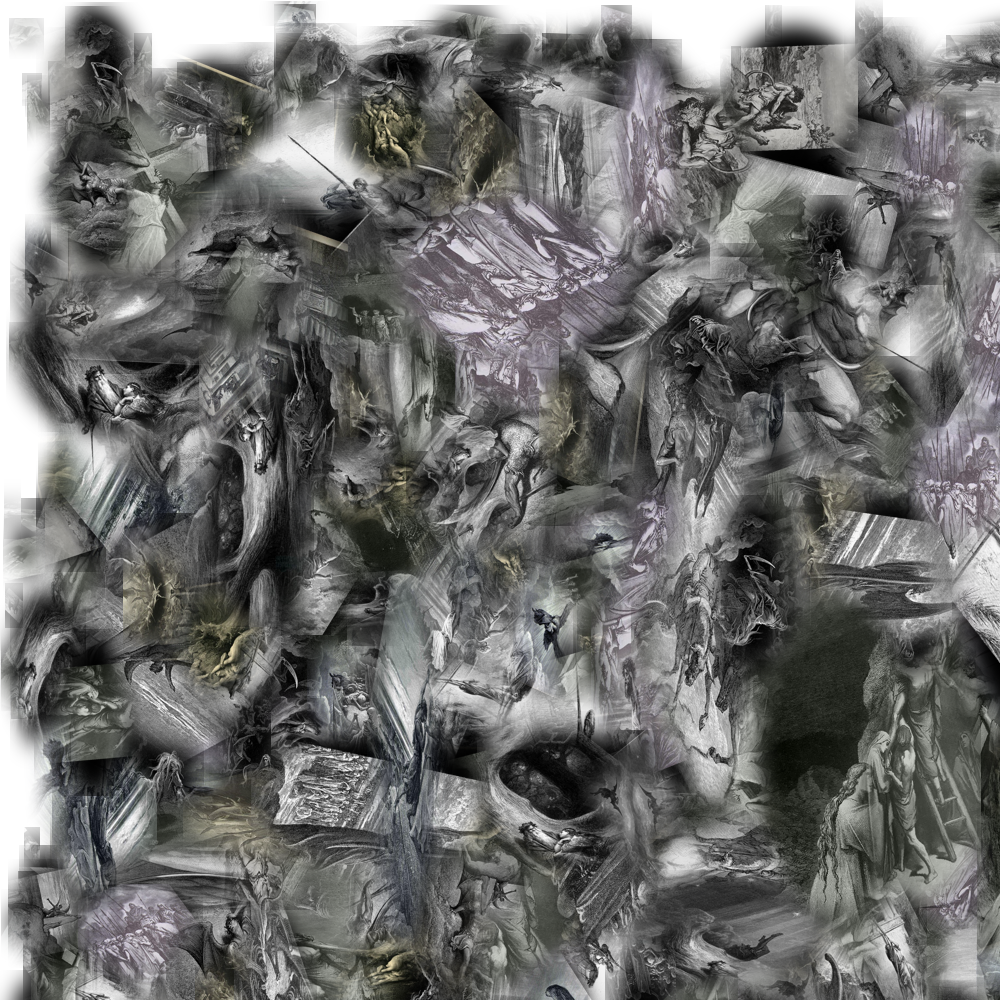

In [75]:
im

### Parte 2

La siguiente parte sera la superposición de imagenes. Para esta parte se leera la imagene se separara en sus canales de colores basicos para identificar cual es el que mejor distingue entre el la imagen de interes y su fondo.

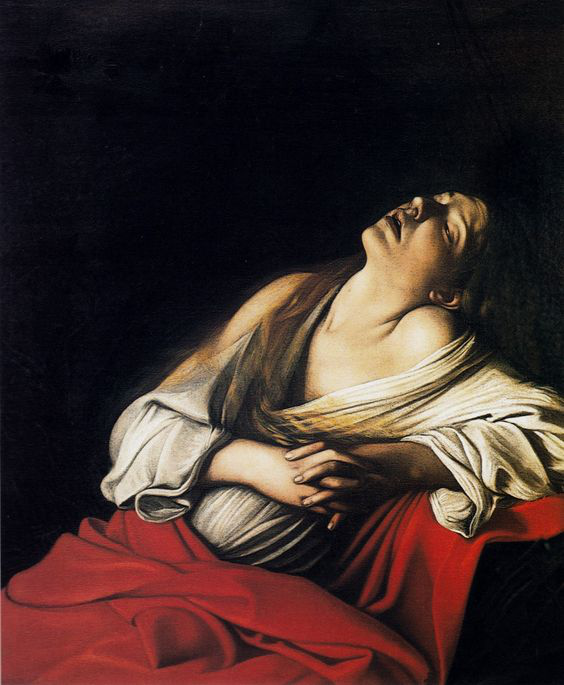

In [77]:
with Image.open(".\\Caravaggio.jpg") as img:
    img.load()
img 


In [78]:
red, green, blue = img.split()

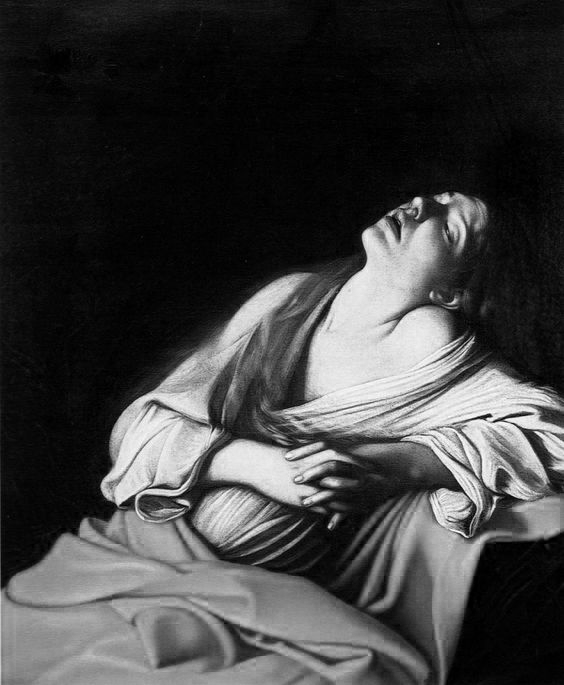

In [79]:
red

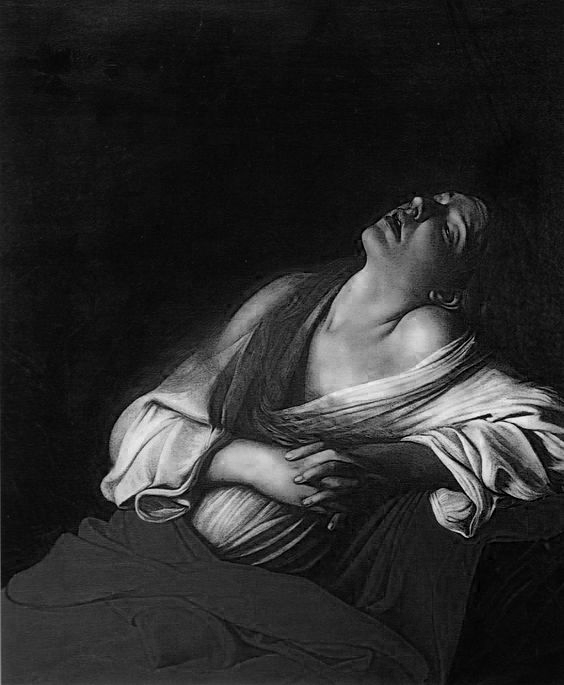

In [80]:
blue

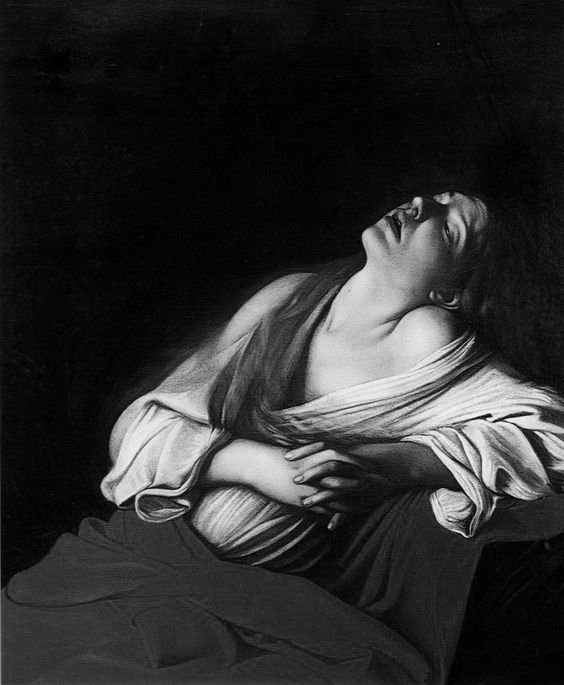

In [81]:
green

El canal rojo tiene un mayor contraste entre los pixeles que representan a la mujer y los que represetan al fondo

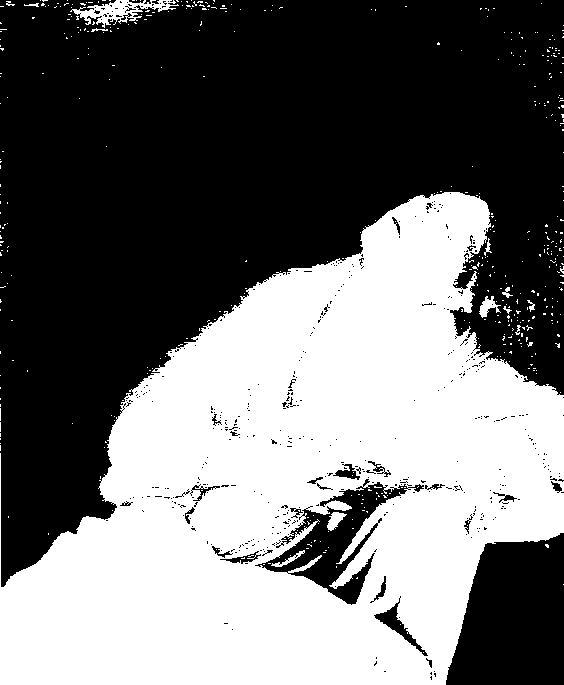

In [82]:
umbral = 25
img_umbral = red.point(lambda x: 255 if x > umbral else 0)
img_umbral = img_umbral.convert("1")
img_umbral

Se elige un umbral de 75 para la función convert a manera de prueba y error.

In [84]:
def erode(cycles, image):
    for _ in range(cycles):
         image = image.filter(ImageFilter.MinFilter(3))
    return image


def dilate(cycles, image):
    for _ in range(cycles):
         image = image.filter(ImageFilter.MaxFilter(3))
    return image

Se erociona y dilata la imagen para crear una mascara que elimine el fondo

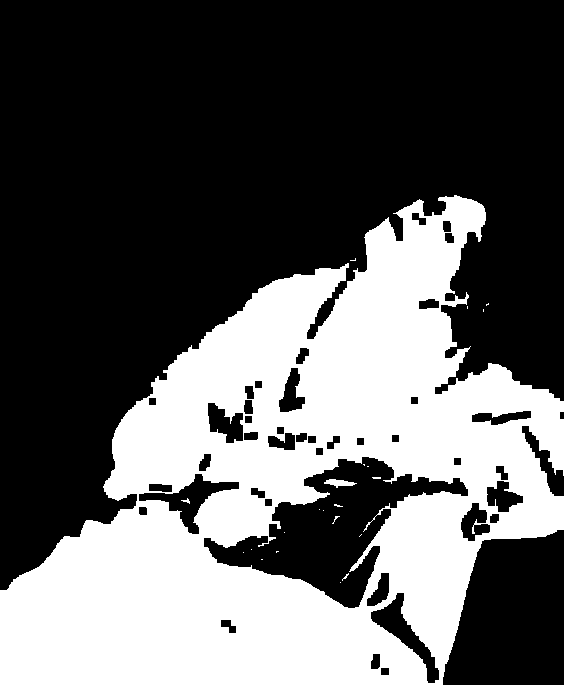

In [85]:
paso1 = erode(3, img_umbral)
paso1

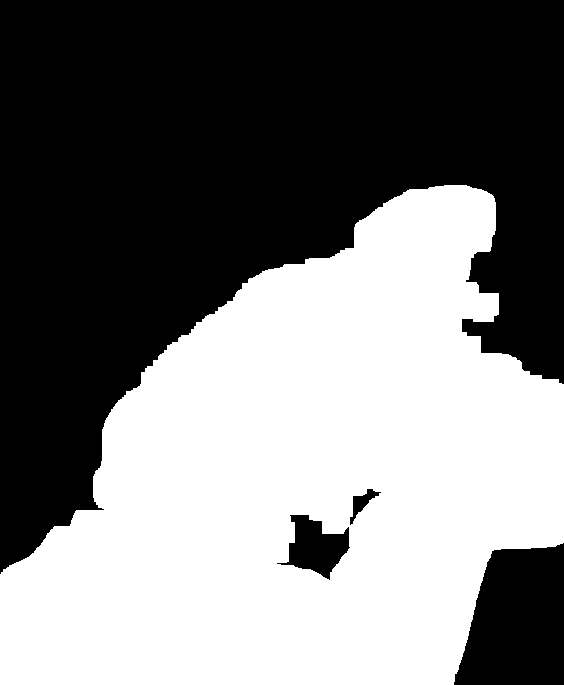

In [86]:
mascara = dilate(10, paso1)
mascara

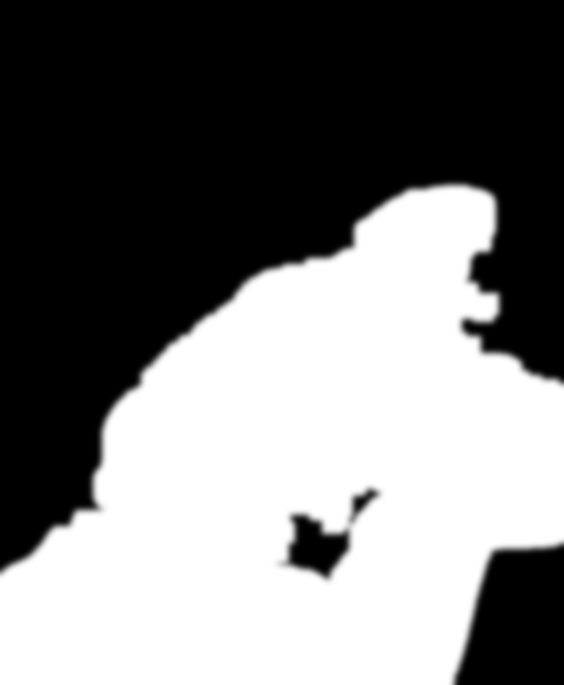

In [87]:
mascara = mascara.convert("L")
mascara = mascara.filter(ImageFilter.GaussianBlur(3))
mascara

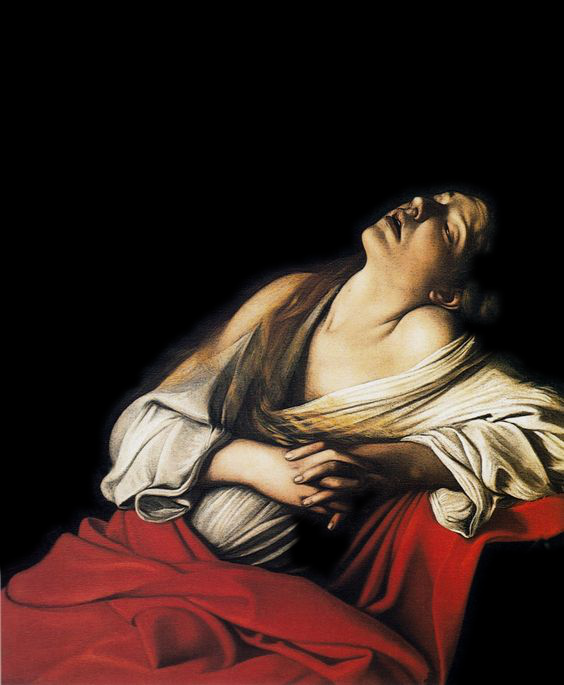

In [88]:
blank = img.point(lambda _: 0)
final = Image.composite(img,blank,mascara)
final

In [89]:
im.paste(img.resize((img.width // 2, img.height // 2)),
(0,0),
 mascara.resize((mascara.width//2,mascara.height//2)))


im.paste(img.resize((img.width // 2, img.height // 2)),
(100,200),
 mascara.resize((mascara.width//2,mascara.height//2)))

 
im.paste(img.resize((img.width // 2, img.height // 2)),
(200,400),
 mascara.resize((mascara.width//2,mascara.height//2)))

 
im.paste(img.resize((img.width // 2, img.height // 2)),
(200,600),
 mascara.resize((mascara.width//2,mascara.height//2)))

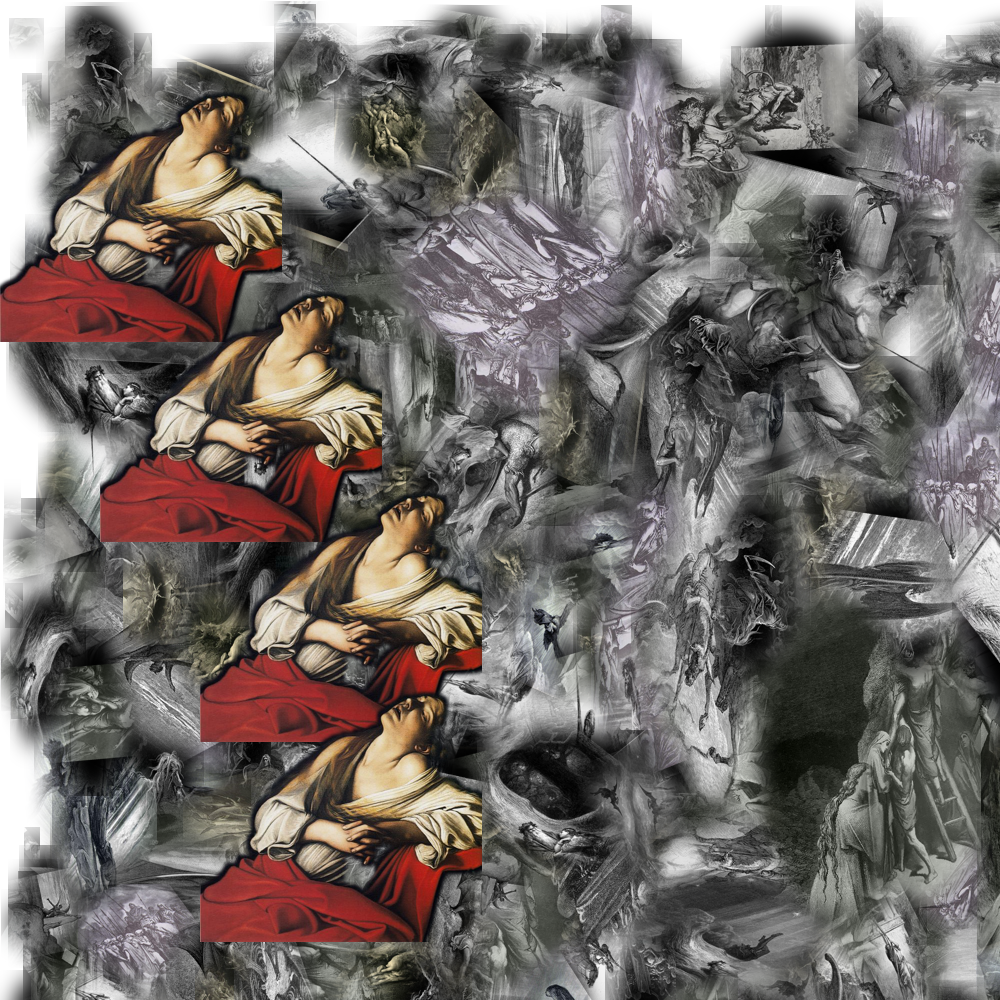

In [90]:
im